In [1]:
##13 july


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# from IPython.core.interactiveshell import InteractiveShell  
# InteractiveShell.ast_node_interactivity = "all"
# # InteractiveShell.ast_node_interactivity = "last_expr"

In [3]:
2+3
5-6

-1

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
# # !pip install pandas-profiling
# import pandas_profiling
# pandas_profiling.ProfileReport(train)

In [6]:
profile = pandas_profiling.ProfileReport(train)
profile.to_file(output_file="Titanic data profiling.html")

NameError: name 'pandas_profiling' is not defined

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


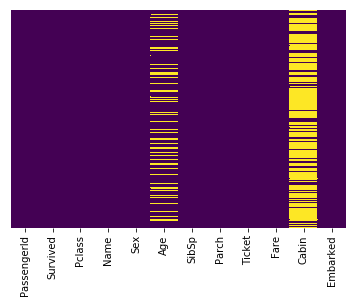

In [9]:
sns.heatmap(train.isnull(), yticklabels=False,\
            cbar=False,cmap='viridis')

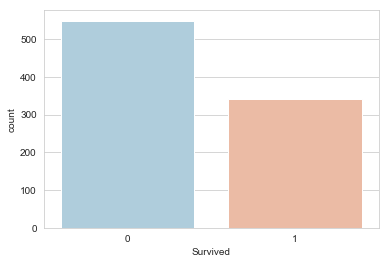

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

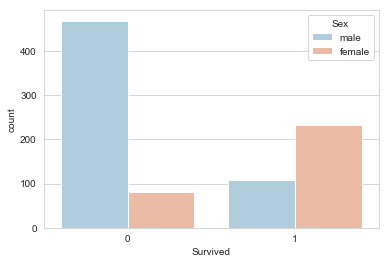

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train, \
              palette='RdBu_r')

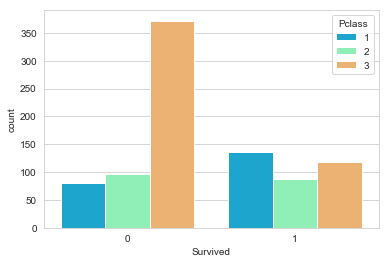

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,\
              palette='rainbow')

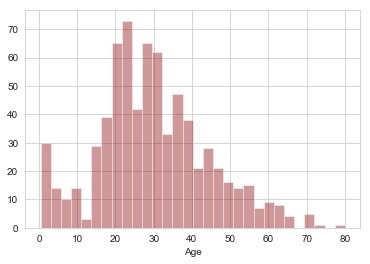

In [13]:
sns.distplot(train['Age'].dropna(),kde=False,\
             color='darkred',bins=30)

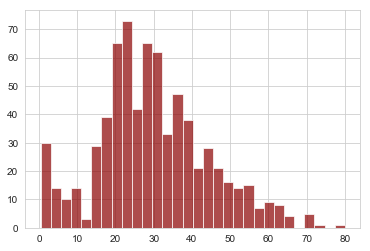

In [14]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

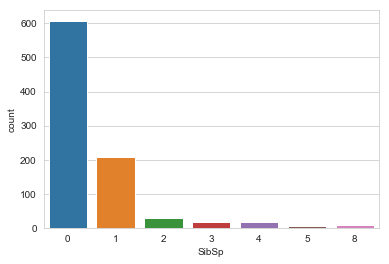

In [15]:
sns.countplot(x='SibSp',data=train)

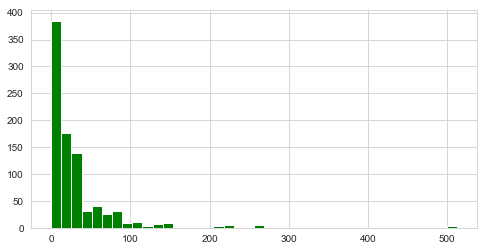

In [16]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [19]:
pip install cufflinks

  Stored in directory: C:\Users\siddharth\AppData\Local\pip\Cache\wheels\8d\5a\6f\c97d47dc901071611809eb61aaa477d50a60692dc764dca622
  Stored in directory: C:\Users\siddharth\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built cufflinks retrying
Note: you may need to restart the kernel to use updated packages.


In [20]:
 import cufflinks as cf
 cf.go_offline()

In [21]:
 train['Fare'].iplot(kind='hist',bins=30,color='green')

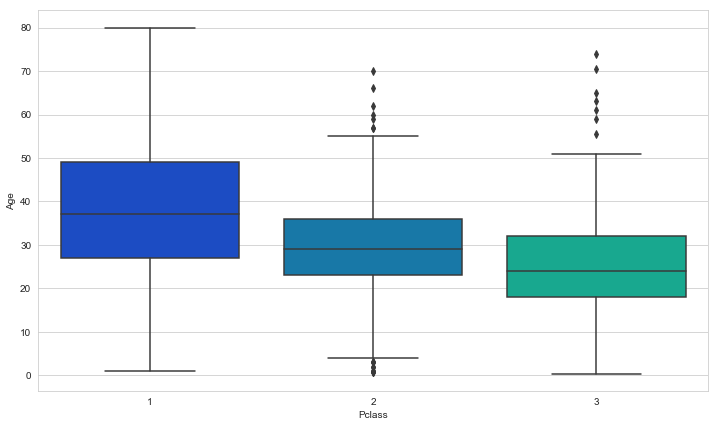

In [22]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [330]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [331]:
train[train['Pclass']==1]['Age'].mean()
train[train['Pclass']==2]['Age'].mean()
train[train['Pclass']==3]['Age'].mean()

38.233440860215055

29.87763005780347

25.14061971830986

In [332]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38.9

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [333]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [334]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [335]:
age_mean = train.groupby('Pclass')['Age'].mean()
age_mean

Pclass
1    38.326019
2    29.825163
3    24.824684
Name: Age, dtype: float64

In [336]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Now let's check that heat map again!

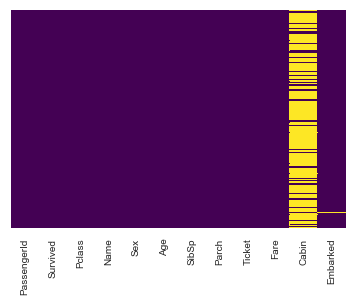

In [337]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [338]:
train.info()
# pandas_profiling.ProfileReport(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [339]:
train.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)

In [340]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [341]:
train.dropna(inplace=True)

In [342]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [343]:
# sex = pd.get_dummies(train['Sex'],drop_first=True)
# embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [346]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
train['Sex'] = LE.fit_transform(train['Sex'])

In [347]:
train['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [348]:
train['Embarked'] = LE.fit_transform(train['Embarked'])

In [353]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [355]:
from sklearn.model_selection import train_test_split

In [356]:
X = train.drop('Survived', axis=1)
Y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,Y, \
                                                    test_size=0.30, 
                                                    random_state=101)

In [387]:
from sklearn.linear_model import LogisticRegression

In [635]:
logmodel = LogisticRegression() # , class_weight='balanced'
lm = logmodel.fit(X_train,y_train)

In [636]:
predictions = logmodel.predict(X_test)

In [628]:
from sklearn.metrics import classification_report

In [629]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       163
           1       0.85      0.66      0.75       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.81       267
weighted avg       0.83      0.82      0.82       267



In [630]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,predictions)
print(matrix)

[[151  12]
 [ 35  69]]


In [631]:
logmodel.score(X_test, y_test)

0.8239700374531835

In [479]:
predictions[:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [481]:
df = pd.DataFrame(y_test)
df['Predicted'] = predictions

In [482]:
df.tail()

,Survived,Predicted
792,0,0
828,1,0
732,0,0
669,1,1
634,0,1


In [483]:
logmodel.predict_proba(X_test[:5]) 

array([[0.88913642, 0.11086358],
       [0.86975134, 0.13024866],
       [0.22411284, 0.77588716],
       [0.07661205, 0.92338795],
       [0.86569696, 0.13430304]])

In [486]:
df1 = pd.DataFrame(logmodel.coef_, columns=X.columns)
df1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0002,-1.080618,-2.562127,-0.039915,-0.243521,-0.100872,0.001854,-0.163383


In [487]:
logmodel.intercept_

array([4.88962424])

In [638]:
from sklearn.linear_model import SGDClassifier
SGD_clf = SGDClassifier()

In [639]:
SGD_clf.fit(X_train, y_train)  # default loss='hinge'

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [641]:
predictions = logmodel.predict(X_test)
SGD_clf.score(X_test, y_test)

0.6779026217228464

In [488]:
# Load libraries
# import pandas
# import numpy
# import matplotlib.pyplot as plt
# from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import Imputer
from sklearn import model_selection
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [501]:
import warnings
warnings.simplefilter("ignore")

In [560]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
n_splits = 5
for name, model in models:
    kfold = model_selection.KFold(n_splits=n_splits, shuffle=True, \
                                  random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, \
                                                 y_train, cv=kfold, \
                                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %5.2f (%5.2f)" % (name, cv_results.mean()*100, \
                           cv_results.std()*100)
    print(msg)

LR: 78.61 ( 1.72)
LDA: 79.09 ( 1.67)
KNN: 65.27 ( 2.16)
CART: 74.44 ( 2.07)
NB: 77.81 ( 1.97)
SVM: 62.22 ( 1.65)


In [561]:
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())

In [562]:
# results_df.drop(['CV Mean', 'CV Std Dev'], inplace=True, axis = 1)
results_df

,CV1,CV2,CV3,CV4,CV5
LR,0.82,0.79,0.78,0.77,0.77
LDA,0.82,0.80,0.79,0.78,0.77
KNN,0.64,0.66,0.69,0.66,0.62
CART,0.73,0.74,0.73,0.78,0.75
NB,0.79,0.78,0.81,0.75,0.77
SVM,0.61,0.61,0.62,0.62,0.65


In [563]:
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)

In [564]:
pd.set_option('precision',2)
results_df*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
LR,81.6,79.2,78.23,77.42,76.61,78.61,1.93
LDA,81.6,80.0,79.03,78.23,76.61,79.09,1.87
KNN,64.0,65.6,68.55,66.13,62.10,65.27,2.41
CART,72.8,73.6,72.58,78.23,75.00,74.44,2.32
NB,79.2,77.6,80.65,75.00,76.61,77.81,2.20
SVM,60.8,60.8,62.10,62.10,65.32,62.22,1.85


In [565]:
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
LDA,81.6,80.0,79.03,78.23,76.61,79.09,1.87
LR,81.6,79.2,78.23,77.42,76.61,78.61,1.93
NB,79.2,77.6,80.65,75.00,76.61,77.81,2.20
CART,72.8,73.6,72.58,78.23,75.00,74.44,2.32
KNN,64.0,65.6,68.55,66.13,62.10,65.27,2.41
SVM,60.8,60.8,62.10,62.10,65.32,62.22,1.85


In [503]:
# InteractiveShell.ast_node_interactivity = "last_expr"

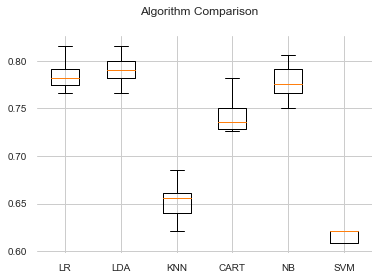

In [566]:
# %matplotlib inline
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [568]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)

results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledLR,81.6,79.2,79.84,79.84,78.23,79.74,1.23
ScaledKNN,80.8,82.4,76.61,83.06,75.81,79.74,3.34
ScaledSVM,80.8,82.4,77.42,79.03,76.61,79.25,2.38
ScaledLDA,81.6,80.0,79.03,78.23,76.61,79.09,1.87
ScaledNB,79.2,77.6,80.65,75.00,76.61,77.81,2.20
ScaledCART,75.2,72.0,72.58,78.23,71.77,73.96,2.75


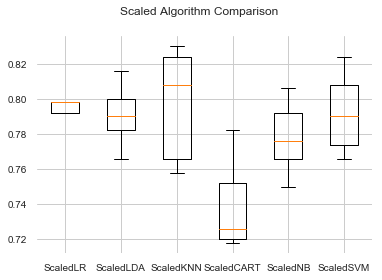

In [569]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [570]:
# Normalize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)

results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledLR,81.6,80.8,78.23,78.23,77.42,79.25,1.83
ScaledLDA,81.6,80.0,79.03,78.23,76.61,79.09,1.87
ScaledKNN,80.8,83.2,75.81,80.65,75.00,79.09,3.53
ScaledSVM,83.2,79.2,77.42,78.23,74.19,78.45,3.25
ScaledNB,79.2,77.6,80.65,75.00,76.61,77.81,2.20
ScaledCART,76.0,68.8,73.39,77.42,73.39,73.80,3.29


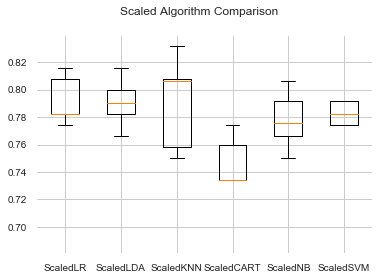

In [571]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [573]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))  
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
results = []
names = []
for name, model in ensembles:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)
    
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledGBM,82.4,79.2,76.61,82.26,80.65,80.22,2.41
ScaledRF,80.8,79.2,79.03,83.06,78.23,80.06,1.92
ScaledET,82.4,78.4,78.23,76.61,82.26,79.58,2.61
ScaledAB,79.2,76.8,73.39,77.42,75.81,76.52,2.14


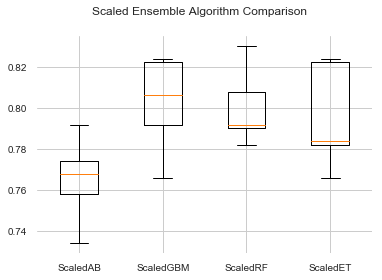

In [574]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [604]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21,25,30,35,40]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier('euclidean')

kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, \
                    scoring='accuracy', cv=kfold, )

grid_result = grid.fit(rescaledX, y_train)

In [605]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.799035 using {'n_neighbors': 9}


In [606]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.755627 (0.031057) with: {'n_neighbors': 1}
0.787781 (0.013659) with: {'n_neighbors': 3}
0.797428 (0.031419) with: {'n_neighbors': 5}
0.794212 (0.016938) with: {'n_neighbors': 7}
0.799035 (0.022855) with: {'n_neighbors': 9}
0.795820 (0.022621) with: {'n_neighbors': 11}
0.797428 (0.016158) with: {'n_neighbors': 13}
0.792605 (0.014524) with: {'n_neighbors': 15}
0.790997 (0.014051) with: {'n_neighbors': 17}
0.784566 (0.016236) with: {'n_neighbors': 19}
0.776527 (0.014396) with: {'n_neighbors': 21}
0.779743 (0.011386) with: {'n_neighbors': 25}
0.778135 (0.006584) with: {'n_neighbors': 30}
0.774920 (0.012953) with: {'n_neighbors': 35}
0.779743 (0.016731) with: {'n_neighbors': 40}


In [608]:
model = KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [610]:
model.fit( rescaledX, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [ ]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()